# Plots for times
### Different plots and comparisons of the times obtained from the different methods, thresholds and words

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re, json




First, initialise with random floats (will use the actual times later)

In [109]:
#Array: threshold x words x distancia
D = np.zeros((5, 10, 10), float)
for i in range(5):
    for j in range(10):
        for k in range(10):
                D[i][j][k] = round(np.random.uniform(0.5,3), 3)
print(D)

[[[1.981 2.389 0.61  0.987 1.03  2.054 2.696 1.599 1.224 1.231]
  [2.108 2.243 0.856 2.956 2.202 0.562 1.247 1.842 1.136 1.874]
  [1.416 1.267 1.937 0.82  2.945 1.329 1.79  1.26  1.645 2.264]
  [2.1   2.046 2.268 1.394 0.864 2.291 2.792 1.611 1.786 1.241]
  [2.686 0.879 2.567 1.743 1.929 1.329 2.206 0.675 2.577 0.595]
  [1.598 1.067 1.482 0.88  2.539 2.175 0.77  2.427 2.676 1.07 ]
  [0.812 2.805 2.354 2.238 1.836 1.03  2.751 1.33  1.493 0.539]
  [0.737 0.595 2.367 2.869 0.999 0.647 2.488 1.729 1.336 0.903]
  [0.704 2.319 2.955 1.085 2.963 2.799 1.845 1.416 0.533 2.327]
  [2.634 1.107 1.    1.025 0.805 0.995 2.069 2.719 2.601 0.99 ]]

 [[2.097 1.898 2.93  2.454 2.882 1.118 2.763 1.14  2.838 1.772]
  [1.108 0.818 0.751 1.065 1.798 2.938 2.06  1.49  1.967 1.104]
  [1.627 1.653 1.535 2.553 2.661 2.84  2.389 1.779 1.999 1.617]
  [1.345 2.709 2.85  1.406 2.774 2.94  2.276 2.726 1.852 1.096]
  [1.129 1.047 2.789 1.333 2.693 2.177 1.851 1.624 2.379 2.435]
  [2.628 2.975 1.128 1.726 1.827 2.544

In [108]:
#Array: threshold x words x distancia
#for i in range(5):
 #   for j in range(10):
  #      for k in range(10):
   #             D[i][j][k] = i+j+k
#print(D)

Now some variables we need for axes, titles and so on:


In [75]:
words = sorted(["tal", "casa", "senor", "jabón", "constitución", "ancho",
                            "savaedra", "vicios", "quixote", "s3afg4ew"], key = len)
dist_names = ["lev", "lev_cota", "restr", "restr_cota", "intermediate", "trie_lev", "trie_lev_improved", "trie_restr", "trie_restr_improved", "trie_intermediate"]
thresholds = [1, 2, 3, 5, 7]


First Plot: 10 different coordinate systems each corresponding to a word, each having 6 lines (the most improved versions of the 3 distances both in normal and trie version) with x axis as threshold and y axis as time


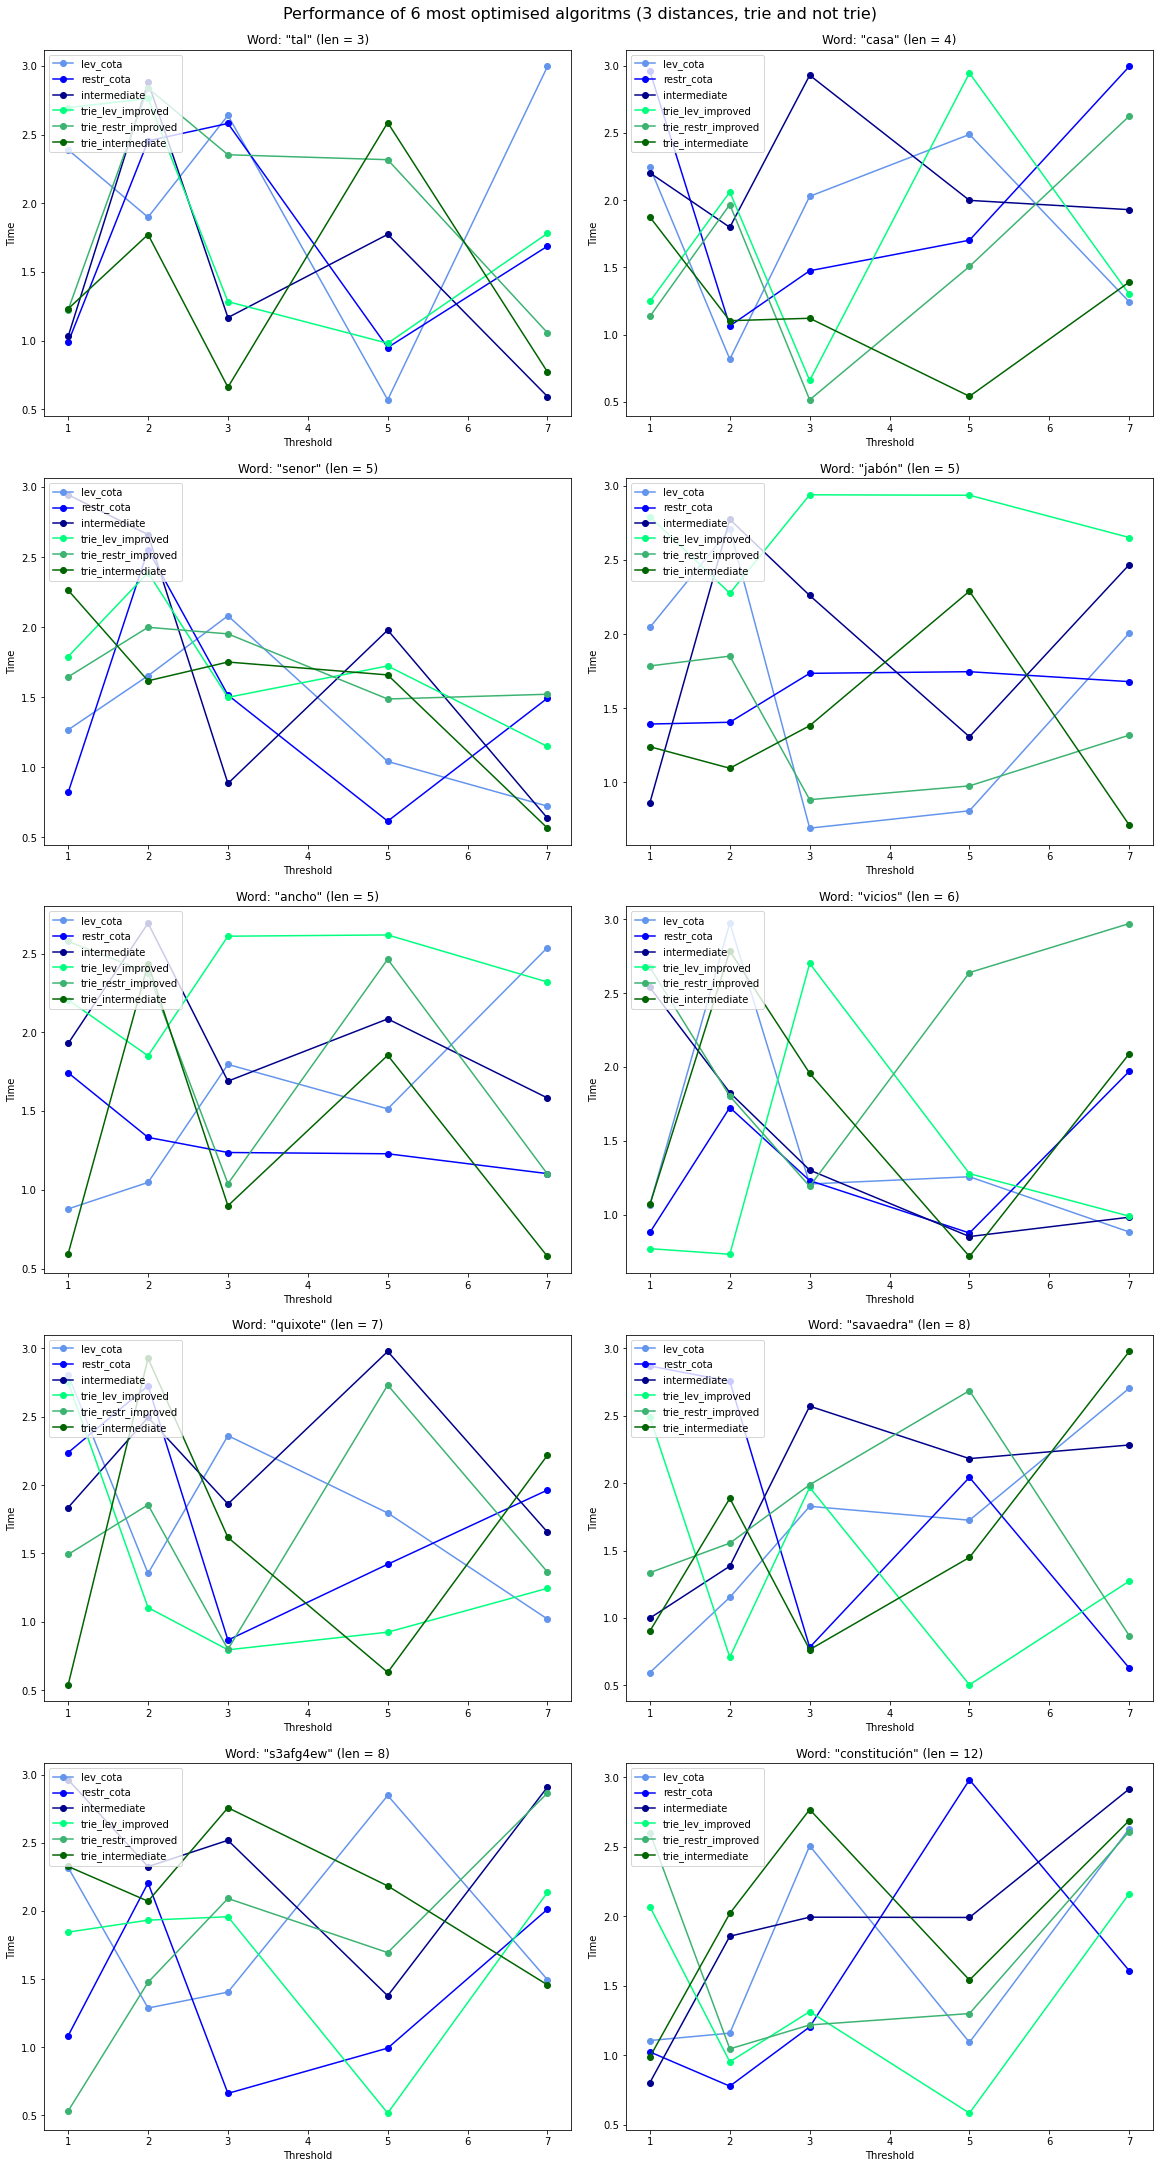

In [110]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 30), constrained_layout = True)
fig.suptitle("Performance of 6 most optimised algoritms (3 distances, trie and not trie)", fontsize = 16)
configs1 = ["cornflowerblue", "cornflowerblue", "blue", "blue", "darkblue", "springgreen", "springgreen", \
            "mediumseagreen", "mediumseagreen", "darkgreen"]
for i in range(10):
    axes[i//2][i%2].set_title("Word: \""+words[i]+"\" (len = "+str(len(words[i]))+")")
    axes[i//2][i%2].set_ylabel("Time")
    axes[i//2][i%2].set_xlabel("Threshold")
    for j in [1, 3, 4, 6, 8, 9]:
        axes[i//2][i%2].plot(thresholds, D[:,i,j], '-o', color = configs1[j], label = dist_names[j])
    axes[i//2][i%2].legend(loc='upper left')



Plot number 2: compares the speedup of the different improvements of the functions

[3, 4, 5, 5, 5, 6, 7, 8, 8, 12]


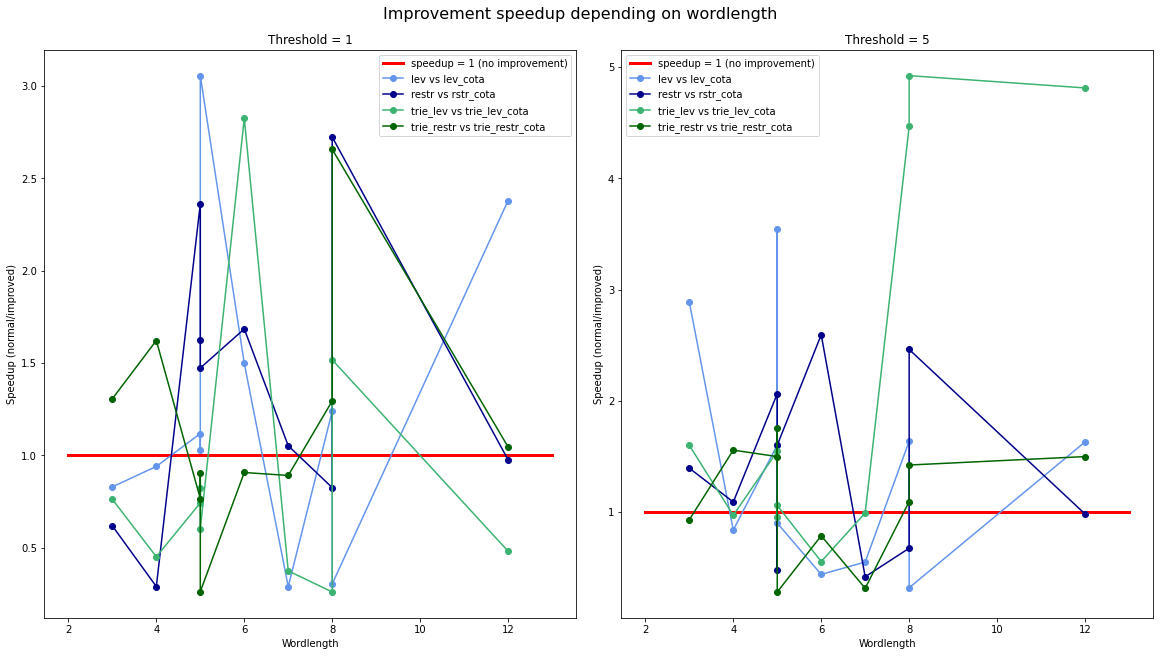

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,9), constrained_layout=True)
fig.suptitle("Improvement speedup depending on wordlength", fontsize = 16)
threshindices = [0, 3]
wordlengths = [len(w) for w in words]
print(wordlengths)
for i in [0, 1]:
    axes[i].set_title("Threshold = "+str(thresholds[threshindices[i]]))
    axes[i].set_ylabel("Speedup (normal/improved)")
    axes[i].set_xlabel("Wordlength")
    axes[i].plot([2, 13], [1, 1], color = "red", label = "speedup = 1 (no improvement)", linewidth = 3)
    #normal lev vs normal lev improved -> index 0 and index 1
    axes[i].plot(wordlengths, [(x/y) for x,y in zip(D[threshindices[i],:,0], D[threshindices[i],:,1])], '-o', label ="lev vs lev_cota", color = "cornflowerblue")
    #normal restr vs normal restr improved -> index 2 and index 3
    axes[i].plot(wordlengths, [(x/y) for x,y in zip(D[threshindices[i],:,2], D[threshindices[i],:,3])], '-o', label ="restr vs rstr_cota", color = "darkblue")
    #trie lev vs trie lev improved -> index 5 and index 6
    axes[i].plot(wordlengths, [(x/y) for x,y in zip(D[threshindices[i],:,5], D[threshindices[i],:,6])], '-o', label ="trie_lev vs trie_lev_cota", color = "mediumseagreen")
    #trie restr vs trie restr improved -> index 7 and index 8
    axes[i].plot(wordlengths, [(x/y) for x,y in zip(D[threshindices[i],:,7], D[threshindices[i],:,8])], '-o', label ="trie_restr vs trie_restr_cota", color = "darkgreen")
    axes[i].legend()


#    axes[i//2][i%2].legend(loc='upper left')


Now the speedup when using the trie algorithm vs when using the normal algorithm, comparing the optimised versions

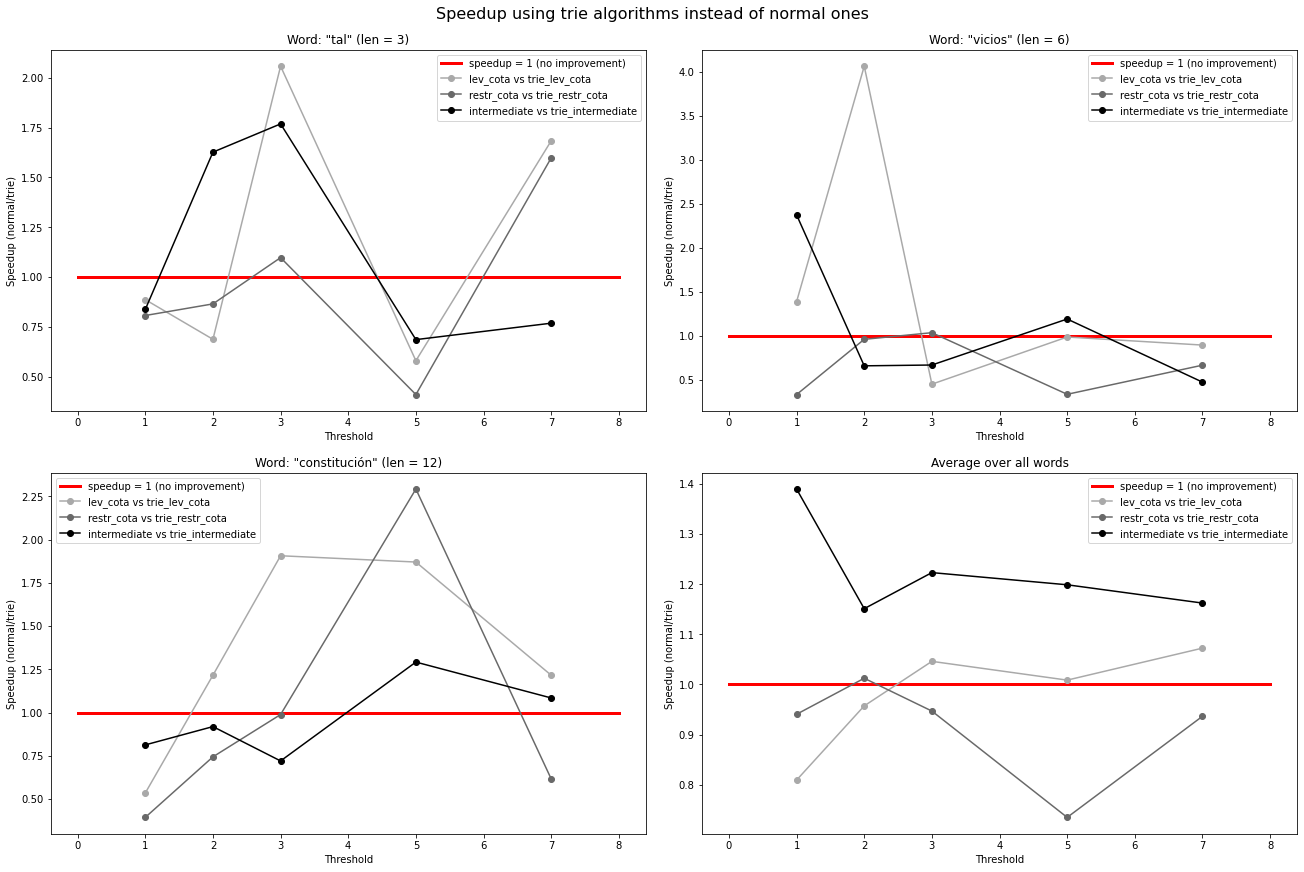

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12), constrained_layout=True)
fig.suptitle("Speedup using trie algorithms instead of normal ones", fontsize = 16)
wordindices = [0, 5, 9]
titles = [("Word: \""+words[wordindices[i]]+"\" (len = "+str(len(words[wordindices[i]]))+")") for i in range(3)] \
+ ["Average over all words"]
algoindices = [(1, 6), (3, 8), (4, 9)]
y_values = np.zeros((4, 3, 5),float)

for j in range(3):
    for i in range(3):
        a, b = algoindices[j]
        w = wordindices[i]
        y_values[i][j] = [x/y for x,y in zip(D[:,w,a], D[:,w,b])]
    avg1 = [np.mean(list) for list in D[:,:,a]]
    avg2 = [np.mean(list) for list in D[:,:,b]]
    y_values[3][j] = [x/y for x,y in zip(avg1, avg2)]
    
for i in range(4):
    axes[i//2][i%2].set_title(titles[i])
    axes[i//2][i%2].set_xlabel("Threshold")
    axes[i//2][i%2].set_ylabel("Speedup (normal/trie)")
    axes[i//2][i%2].plot([0, 8], [1, 1], color = "red", label = "speedup = 1 (no improvement)", linewidth = 3)
    axes[i//2][i%2].plot(thresholds, y_values[i][0], '-o', label = "lev_cota vs trie_lev_cota", color = "darkgrey")
    axes[i//2][i%2].plot(thresholds, y_values[i][1], '-o', label = "restr_cota vs trie_restr_cota", color = "dimgrey")
    axes[i//2][i%2].plot(thresholds, y_values[i][2], '-o', label = "intermediate vs trie_intermediate", color = "black")
    axes[i//2][i%2].legend()
    